This is the code for the data visualizations.

In [1]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# the data
gameData = pd.read_csv("/kaggle/input/gamedata/data.csv")
gameData

,a,b,c,d,e,f,turns
0,2,2,1,2,3,0,3
1,2,2,1,3,2,0,3
2,3,1,1,2,2,1,3
3,2,1,2,1,2,2,3
4,3,1,1,1,3,1,5
...,...,...,...,...,...,...,...
95,0,2,3,2,1,2,3
96,2,1,2,2,1,2,2
97,0,3,2,2,1,2,2
98,2,3,0,2,1,2,2


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Solves')

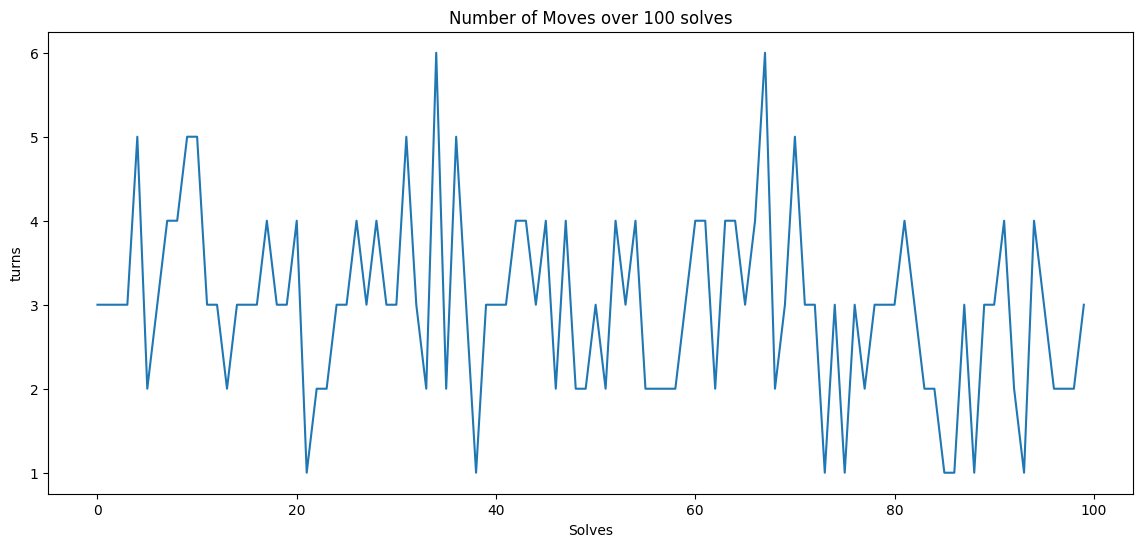

In [2]:
plt.figure(figsize=(14,6))
plt.title("Number of Moves over 100 solves")
sns.lineplot(data=gameData["turns"])
plt.xlabel("Solves")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='turns', ylabel='Count'>

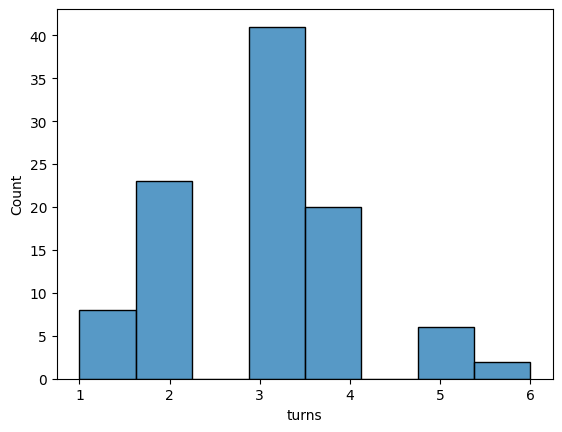

In [3]:
sns.histplot(gameData["turns"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d365811cee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d365811d270>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d365811eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d36581a52d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d3657fba3e0>],
 'means': []}

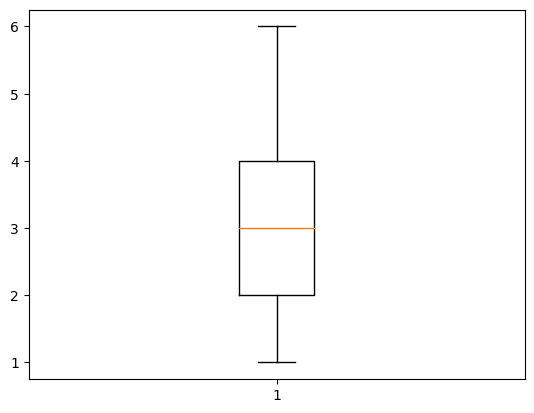

In [4]:
plt.boxplot(gameData["turns"])

These plots show that the number of turns it takes to solve the puzzle is sporadic but on average it takes 3 moves.

The next section is using sklearn to guess the number of turn it takes to solve the puzzle based on how many X's are in each of the rows and columns

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

y = gameData.turns
features = ["a","b","c","d","e","f"]
X = gameData[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.15, random_state=1)

# DecisionTreeRegressor model and mae
DTR_Model = DecisionTreeRegressor(random_state=1)
DTR_Model.fit(train_X, train_y)

DTR_mae = mean_absolute_error(DTR_Model.predict(val_X), val_y)
print("DTR: ")
print(DTR_mae)

# RandomForestRegressor model and mae
RF_Model = RandomForestRegressor(random_state=1)
RF_Model.fit(train_X, train_y)

RF_mae = mean_absolute_error(RF_Model.predict(val_X), val_y)
print("RF: ")
print(RF_mae)

DTR: 
0.7488888888888889
RF: 
0.7732863451363452


This shows that when making predictions using a decision tree regressor is better